In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import utils
import itertools
data = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018_20250208.csv") 

In [2]:
cleandata=data.drop(columns=['SF Find Neighborhoods 2 2','Current Police Districts 2 2', 'Current Supervisor Districts 2 2',
       'Analysis Neighborhoods 2 2', 'DELETE - Fire Prevention Districts 2 2',
       'DELETE - Police Districts 2 2', 'DELETE - Supervisor Districts 2 2',
       'DELETE - Zip Codes 2 2', 'DELETE - Neighborhoods 2 2',
       'DELETE - 2017 Fix It Zones 2 2',
       'Civic Center Harm Reduction Project Boundary 2 2',
       'Fix It Zones as of 2017-11-06  2 2', 'DELETE - HSOC Zones 2 2',
       'Fix It Zones as of 2018-02-07 2 2',
       'CBD, BID and GBD Boundaries as of 2017 2 2',
       'Areas of Vulnerability, 2016 2 2',
       'Central Market/Tenderloin Boundary 2 2',
       'Central Market/Tenderloin Boundary Polygon - Updated 2 2',
       'HSOC Zones as of 2018-06-05 2 2', 'OWED Public Spaces 2 2', 'Address',
       'Neighborhoods 2', 'PdId'])

cleandata['Date'] = pd.to_datetime(cleandata['Date'], format='%m/%d/%Y')

crimedata2 = pd.read_csv("Police_Department_Incident_Reports__2018_to_Present_20250208.csv") 

crimedata2 = crimedata2.replace(['Recovered Vehicle', 'Larceny Theft', 'Lost Property', 'Non-Criminal', 'Drug Violation', 'Assault', 'Malicious Mischief', 'Fraud', 'Warrant', 'Other Offenses', 'Robbery', 'Case Closure', 'Stolen Property','Suspicious Occ', 'Disorderly Conduct', 'Weapons Carrying Etc', 'Rape', 'Drug Offense', 'Missing Person', 'Motor Vehicle Theft', 'Burglary', 'Fire Report', 'Arson', 'Vandalism', 'Suicide', 'Traffic Violation Arrest', 'Forgery And Counterfeiting', 'Sex Offense', 'Prostitution', 'Weapons Offense', 'Miscellaneous Investigation', 'Vehicle Misplaced', 'Suspicious', 'Embezzlement', 'Vehicle Impounded', 'Civil Sidewalks', 'Liquor Laws', 'Gambling', 'Motor Vehicle Theft?', 'Weapons Offence', 'Homicide',  'Other Miscellaneous', 'Other', 'Human Trafficking (A), Commercial Sex Acts', 'Human Trafficking, Commercial Sex Acts', 'Human Trafficking (B), Involuntary Servitude', 'Traffic Collision', 'Courtesy Report', 'Offences Against The Family And Children'], ['RECOVERED VEHICLE','LARCENY/THEFT', 'NON-CRIMINAL', 'NON-CRIMINAL', 'DRUG/NARCOTIC', 'ASSAULT', 'VANDALISM', 'FRAUD', 'WARRANTS', 'OTHER OFFENSES', 'ROBBERY', 'NON-CRIMINAL' , 'STOLEN PROPERTY', 'SUSPICIOUS OCC', 'DISORDERLY CONDUCT', 'WEAPON LAWS', 'SEX OFFENSES, FORCIBLE', 'DRUG/NARCOTIC', 'MISSING PERSON', 'VEHICLE THEFT', 'BURGLARY', 'NON-CRIMINAL', 'ARSON', 'VANDALISM', 'SUICIDE', 'OTHER OFFENSES', 'FORGERY/COUNTERFEITING', 'SEX OFFENSES, NON FORCIBLE', 'PROSTITUTION', 'WEAPON LAWS', 'NON-CRIMINAL', 'NON-CRIMINAL', 'SUSPICIOUS OCC', 'EMBEZZLEMENT', 'SECONDARY CODES', 'DISORDERLY CONDUCT', 'LIQUOR LAWS', 'GAMBLING', 'VEHICLE THEFT', 'WEAPON LAWS', 'ASSAULT', 'SECONDARY CODES', 'SECONDARY CODES', 'SEX OFFENSES, FORCIBLE', 'SEX OFFENSES, FORCIBLE', 'KIDNAPPING', 'NON-CRIMINAL','NON-CRIMINAL', 'OTHER OFFENSES'])

crimeCategory = pd.unique(crimedata2["Incident Category"])

crimedata2cleaned=crimedata2.drop(columns=['Neighborhoods', 'ESNCAG - Boundary File',
       'Central Market/Tenderloin Boundary Polygon - Updated',
       'Civic Center Harm Reduction Project Boundary',
       'Analysis Neighborhood', 'Supervisor District',
       'Supervisor District 2012',      
       'HSOC Zones as of 2018-06-05', 'Invest In Neighborhoods (IIN) Areas',
       'Current Supervisor Districts', 'Current Police Districts', 'Report Type Code',
       'Report Type Description', 'Filed Online', 'Report Datetime', 'CAD Number', 'Incident Subcategory',
       'Intersection', 'CNN','Incident Datetime', 'Row ID', 'Incident Year', 'Incident ID'])

crimedata2cleaned = crimedata2cleaned.dropna(subset=["Incident Category"])

crimedata2cleaned['Incident Date'] = pd.to_datetime(crimedata2cleaned['Incident Date'], format='%Y/%m/%d')

crimedata2cleaned = crimedata2cleaned.iloc[:, [3, 4, 5, 6, 2, 0, 1, 8, 7, 10, 9, 11,]]    

crimedata2cleaned = crimedata2cleaned[crimedata2cleaned['Incident Date'].dt.year != 2025]

crimedata2cleaned = crimedata2cleaned.rename(columns={"Incident Number": "IncidntNum", "Incident Code": "Incident Code", "Incident Category": "Category", "Incident Description": "Descript", "Incident Day of Week": "DayOfWeek", "Incident Date": "Date", "Incident Time": "Time", "Police District": "PdDistrict", "Resolution": "Resolution", "Longitude": "X", "Latitude": "Y", "Point": "location"})

allcrime = pd.concat([cleandata, crimedata2cleaned], ignore_index=True)

focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUG/NARCOTIC', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY'])

allcrimeCategory = pd.unique(allcrime["Category"])
focuscrimes = np.array(list(focuscrimes))

boolstuff = ~np.isin(allcrimeCategory, focuscrimes)
catToToss = allcrimeCategory[boolstuff]
allFocuscrimes = allcrime[~allcrime['Category'].isin(catToToss)]
allFocuscrimes=allFocuscrimes.drop(columns=['Descript'])
allFocuscrimes['Time_real'] = pd.to_datetime(allFocuscrimes['Time'], format='%H:%M')
allFocuscrimes

,IncidntNum,Incident Code,Category,DayOfWeek,Date,Time,PdDistrict,Resolution,X,Y,location,Time_real
0,41334220,3074,ROBBERY,Monday,2004-11-22,17:50,INGLESIDE,NONE,-122.420084,37.708311,POINT (-122.420084075249 37.7083109744362),1900-01-01 17:50:00
1,51185358,7021,VEHICLE THEFT,Tuesday,2005-10-18,20:00,PARK,NONE,-120.500000,90.000000,POINT (-120.50000000000001 90),1900-01-01 20:00:00
2,40188309,7021,VEHICLE THEFT,Sunday,2004-02-15,02:00,SOUTHERN,NONE,-120.500000,90.000000,POINT (-120.50000000000001 90),1900-01-01 02:00:00
4,101081080,4134,ASSAULT,Sunday,2010-11-21,17:00,SOUTHERN,NONE,-122.410541,37.770913,POINT (-122.410541166987 37.7709130566165),1900-01-01 17:00:00
5,130270698,4134,ASSAULT,Tuesday,2013-04-02,15:50,TARAVAL,NONE,-122.470366,37.745158,POINT (-122.470365997562 37.74515794927),1900-01-01 15:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...
3049769,250069222,71013,LARCENY/THEFT,Tuesday,2024-11-26,12:00,Bayview,Open or Active,-122.393616,37.752487,POINT (-122.39361572265625 37.75248718261719),1900-01-01 12:00:00
3049770,250071443,16710,DRUG/NARCOTIC,Tuesday,2024-02-06,08:31,Tenderloin,Cite or Arrest Adult,-122.412598,37.783932,POINT (-122.41259765625 37.783931732177734),1900-01-01 08:31:00
3049776,256011231,6374,LARCENY/THEFT,Wednesday,2024-12-18,12:00,Mission,Open or Active,-122.423958,37.763168,POINT (-122.42395782470703 37.76316833496094),1900-01-01 12:00:00
3049777,250072413,6221,LARCENY/THEFT,Monday,2024-02-05,21:00,Park,Open or Active,-122.495079,37.759029,POINT (-122.49507904052734 37.759029388427734),1900-01-01 21:00:00


In [3]:
day_to_index = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 
                'Friday': 4, 'Saturday': 5, 'Sunday': 6}


allFocuscrimes['hour_of_week'] = allFocuscrimes['Time_real'].dt.hour + (allFocuscrimes['DayOfWeek'].map(day_to_index) * 24)
allFocuscrimes

,IncidntNum,Incident Code,Category,DayOfWeek,Date,Time,PdDistrict,Resolution,X,Y,location,Time_real,hour_of_week
0,41334220,3074,ROBBERY,Monday,2004-11-22,17:50,INGLESIDE,NONE,-122.420084,37.708311,POINT (-122.420084075249 37.7083109744362),1900-01-01 17:50:00,17
1,51185358,7021,VEHICLE THEFT,Tuesday,2005-10-18,20:00,PARK,NONE,-120.500000,90.000000,POINT (-120.50000000000001 90),1900-01-01 20:00:00,44
2,40188309,7021,VEHICLE THEFT,Sunday,2004-02-15,02:00,SOUTHERN,NONE,-120.500000,90.000000,POINT (-120.50000000000001 90),1900-01-01 02:00:00,146
4,101081080,4134,ASSAULT,Sunday,2010-11-21,17:00,SOUTHERN,NONE,-122.410541,37.770913,POINT (-122.410541166987 37.7709130566165),1900-01-01 17:00:00,161
5,130270698,4134,ASSAULT,Tuesday,2013-04-02,15:50,TARAVAL,NONE,-122.470366,37.745158,POINT (-122.470365997562 37.74515794927),1900-01-01 15:50:00,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3049769,250069222,71013,LARCENY/THEFT,Tuesday,2024-11-26,12:00,Bayview,Open or Active,-122.393616,37.752487,POINT (-122.39361572265625 37.75248718261719),1900-01-01 12:00:00,36
3049770,250071443,16710,DRUG/NARCOTIC,Tuesday,2024-02-06,08:31,Tenderloin,Cite or Arrest Adult,-122.412598,37.783932,POINT (-122.41259765625 37.783931732177734),1900-01-01 08:31:00,32
3049776,256011231,6374,LARCENY/THEFT,Wednesday,2024-12-18,12:00,Mission,Open or Active,-122.423958,37.763168,POINT (-122.42395782470703 37.76316833496094),1900-01-01 12:00:00,60
3049777,250072413,6221,LARCENY/THEFT,Monday,2024-02-05,21:00,Park,Open or Active,-122.495079,37.759029,POINT (-122.49507904052734 37.759029388427734),1900-01-01 21:00:00,21


In [4]:
category_counts = allFocuscrimes.groupby(['hour_of_week', 'Category']).size().unstack(fill_value=0)
category_counts

Category,ASSAULT,BURGLARY,DRUG/NARCOTIC,LARCENY/THEFT,PROSTITUTION,ROBBERY,STOLEN PROPERTY,VANDALISM,VEHICLE THEFT,WEAPON LAWS
hour_of_week,,,,,,,,,,
0,1475,954,584,3875,143,487,108,1350,891,216
1,1136,614,365,1940,85,473,64,823,533,147
2,1050,725,296,1373,68,438,46,742,404,139
3,513,851,201,1091,52,241,63,605,329,108
4,443,849,165,858,36,205,53,440,243,67
...,...,...,...,...,...,...,...,...,...,...
163,1750,780,745,6076,35,527,99,1416,1541,232
164,1654,845,582,5660,24,622,81,1525,1760,207
165,1745,842,601,4708,42,656,83,1556,1714,233


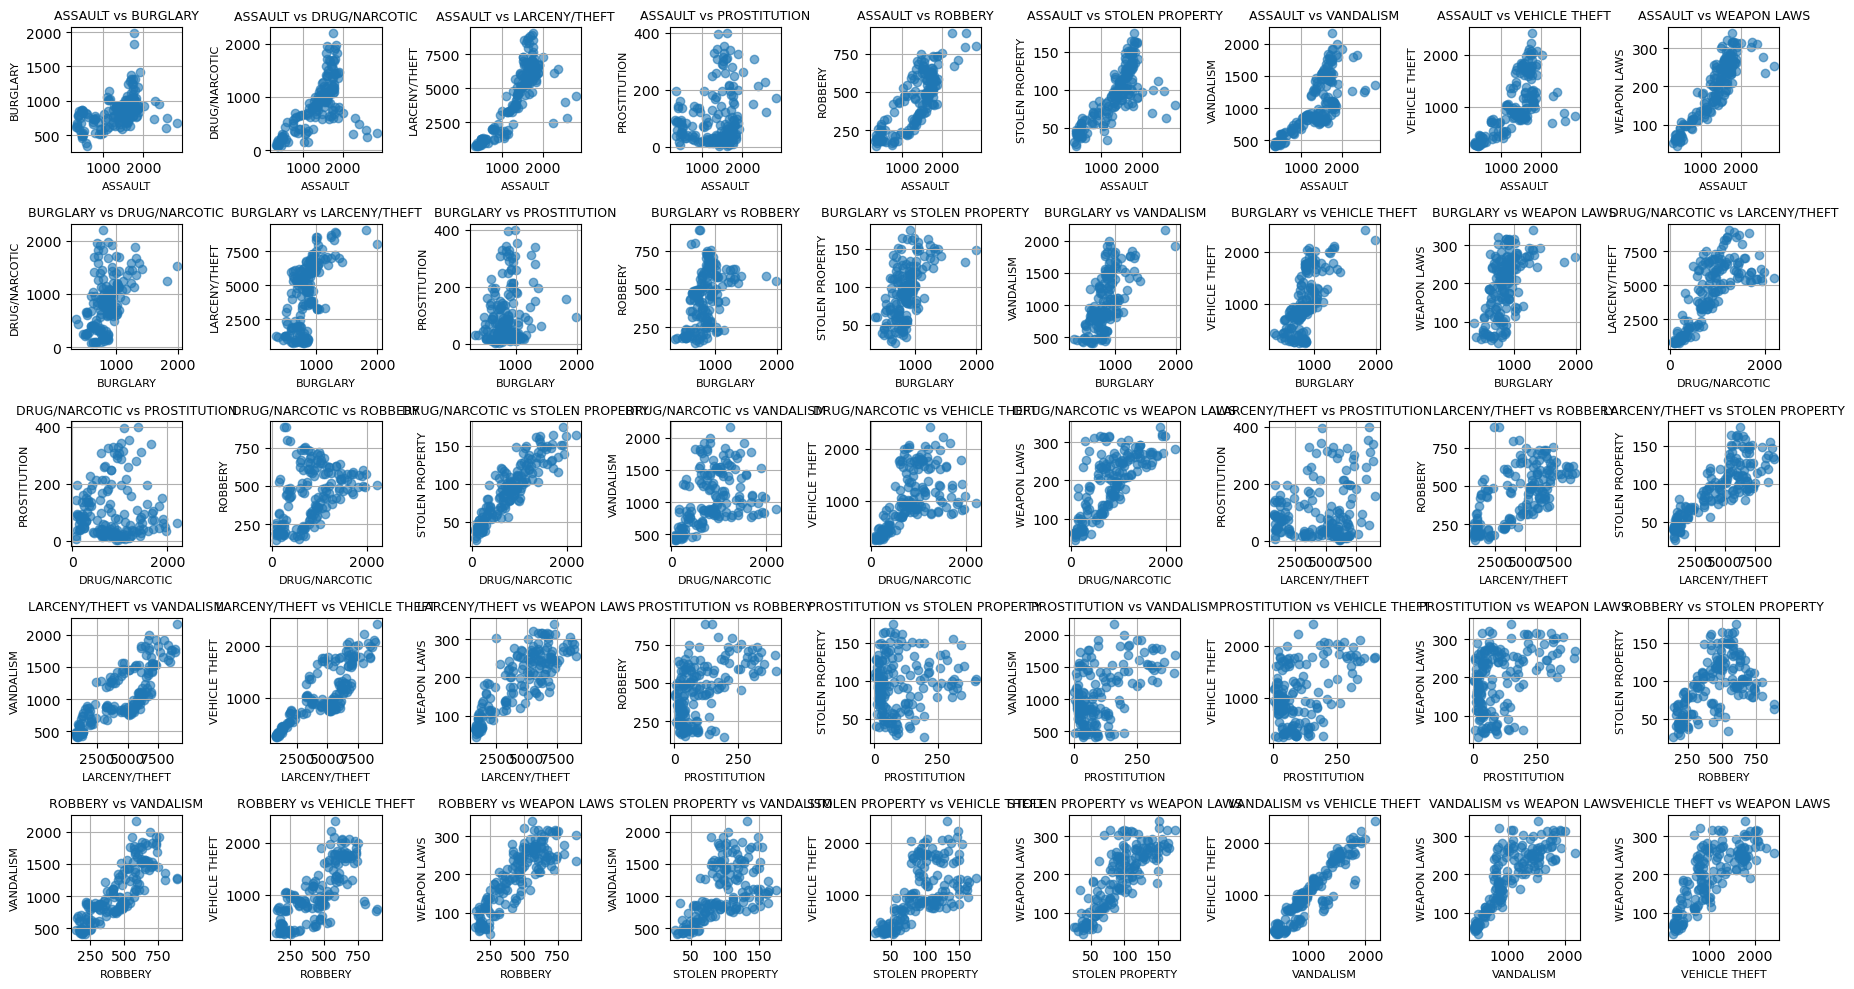

In [5]:
categories = category_counts.columns
category_pairs = list(itertools.combinations(categories, 2))

# Create a 5x9 subplot grid
fig, axes = plt.subplots(5, 9, figsize=(18, 10))  # Adjust figsize for clarity
axes = axes.flatten()  # Flatten to index subplots in a single loop

# Iterate over each category pair and plot in a subplot
for i, (cat1, cat2) in enumerate(category_pairs):
    ax = axes[i]
    ax.scatter(category_counts[cat1], category_counts[cat2], alpha=0.6)
    ax.set_xlabel(cat1, fontsize=8)
    ax.set_ylabel(cat2, fontsize=8)
    ax.set_title(f'{cat1} vs {cat2}', fontsize=9)
    ax.grid(True)

# Hide any empty subplots
for i in range(len(category_pairs), len(axes)):
    fig.delaxes(axes[i])  # Remove extra unused subplots

plt.tight_layout()
plt.show()

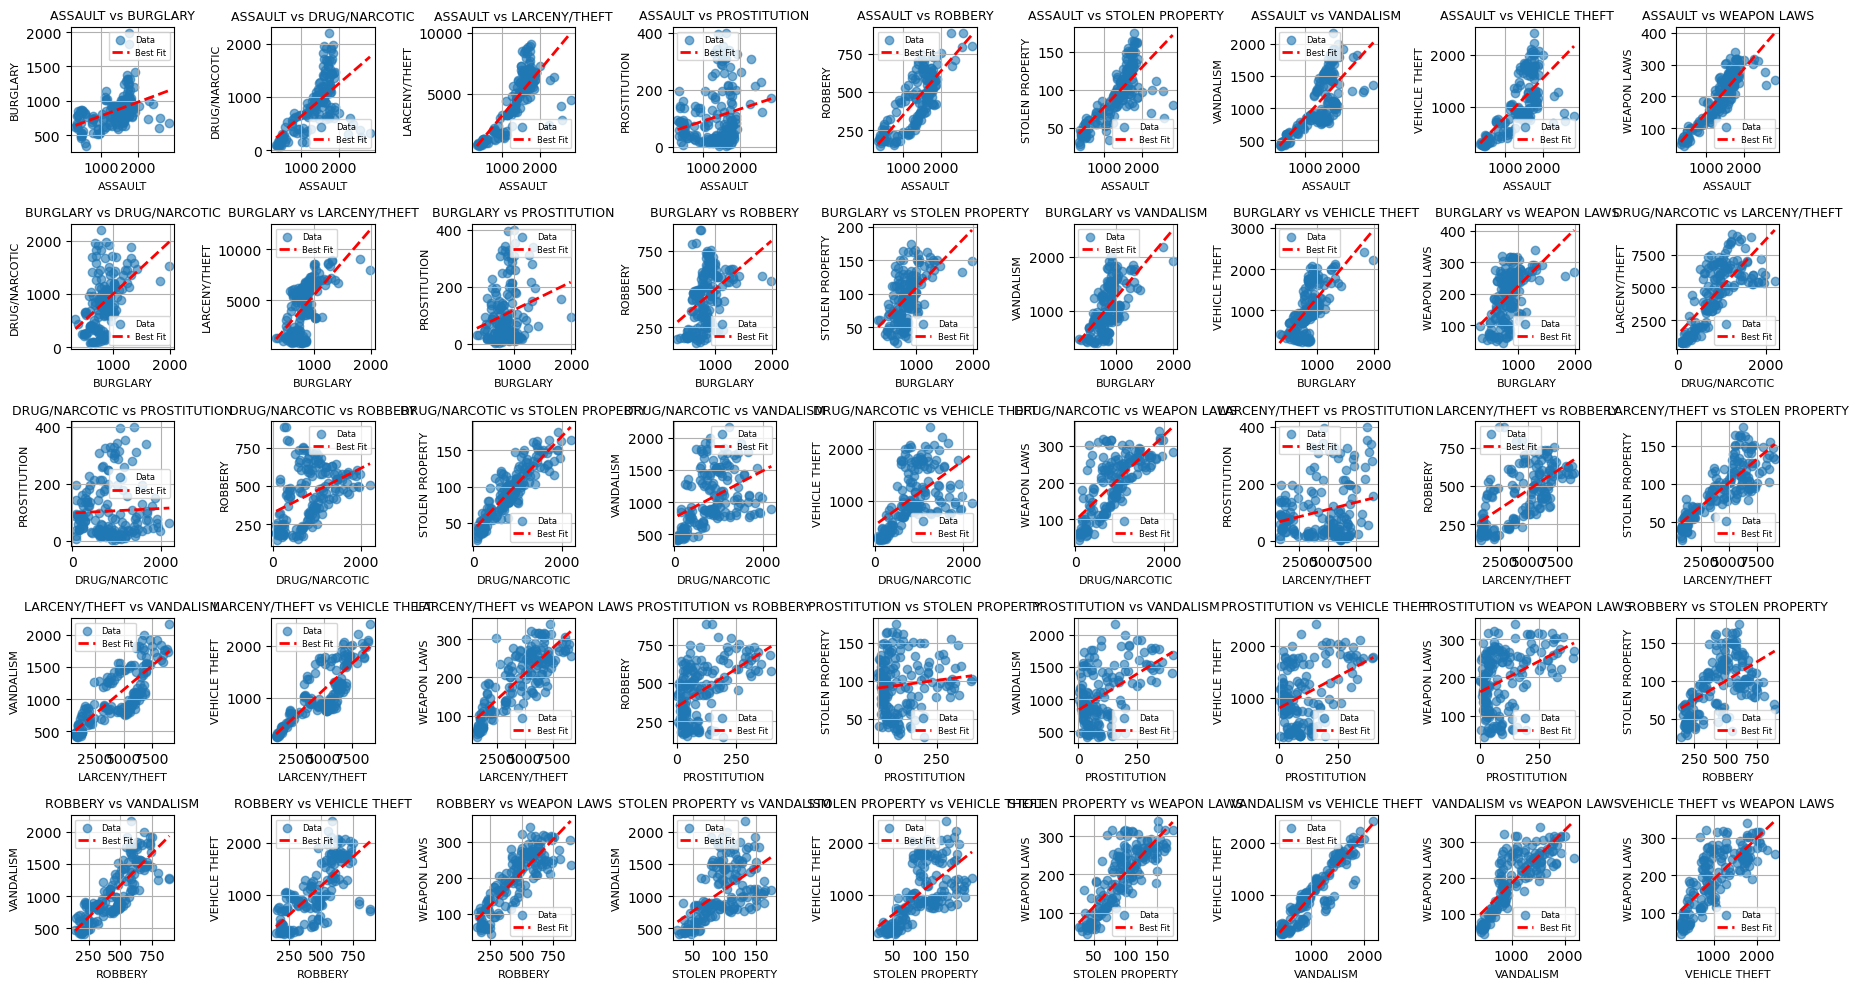

In [6]:


def linearRegression(x, y):
    n = len(x)
    sumx = np.sum(x)
    sumy = np.sum(y)
    sumxy = np.sum(x * y)
    sumx2 = np.sum(x ** 2)

    a = (n * sumxy - sumx * sumy) / (n * sumx2 - sumx**2)
    b = (sumy - a * sumx) / n

    return a, b

fig, axes = plt.subplots(5, 9, figsize=(18, 10))  # Adjust figsize for clarity
axes = axes.flatten()  # Flatten to index subplots in a single loop

# Iterate over each category pair and plot in a subplot
for i, (cat1, cat2) in enumerate(category_pairs):
    ax = axes[i]
    
    # Extract X and Y data
    x_data = category_counts[cat1].to_numpy()
    y_data = category_counts[cat2].to_numpy()
    
    # Scatter plot
    ax.scatter(x_data, y_data, alpha=0.6, label="Data")
    
    # Compute best-fit line
    m, b = linearRegression(x_data, y_data)
    
    # Generate the fitted line
    x_fit = np.linspace(x_data.min(), x_data.max(), 100)  # Generate x values
    y_fit = m * x_fit + b  # Compute y values

    # Plot the best-fit line
    ax.plot(x_fit, y_fit, color='red', linestyle='--', linewidth=2, label="Best Fit")
    
    # Labels
    ax.set_xlabel(cat1, fontsize=8)
    ax.set_ylabel(cat2, fontsize=8)
    ax.set_title(f'{cat1} vs {cat2}', fontsize=9)
    ax.grid(True)
    ax.legend(fontsize=6)

# Hide any empty subplots
for i in range(len(category_pairs), len(axes)):
    fig.delaxes(axes[i])  # Remove extra unused subplots

plt.tight_layout()
plt.show()


In [7]:
pip install bokeh

Note: you may need to restart the kernel to use updated packages.


In [8]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook



In [9]:
output_notebook()

Loading BokehJS ...

In [10]:
allFocuscrimes['hour_of_day'] = allFocuscrimes['Time_real'].dt.hour
allFocuscrimes

,IncidntNum,Incident Code,Category,DayOfWeek,Date,Time,PdDistrict,Resolution,X,Y,location,Time_real,hour_of_week,hour_of_day
0,41334220,3074,ROBBERY,Monday,2004-11-22,17:50,INGLESIDE,NONE,-122.420084,37.708311,POINT (-122.420084075249 37.7083109744362),1900-01-01 17:50:00,17,17
1,51185358,7021,VEHICLE THEFT,Tuesday,2005-10-18,20:00,PARK,NONE,-120.500000,90.000000,POINT (-120.50000000000001 90),1900-01-01 20:00:00,44,20
2,40188309,7021,VEHICLE THEFT,Sunday,2004-02-15,02:00,SOUTHERN,NONE,-120.500000,90.000000,POINT (-120.50000000000001 90),1900-01-01 02:00:00,146,2
4,101081080,4134,ASSAULT,Sunday,2010-11-21,17:00,SOUTHERN,NONE,-122.410541,37.770913,POINT (-122.410541166987 37.7709130566165),1900-01-01 17:00:00,161,17
5,130270698,4134,ASSAULT,Tuesday,2013-04-02,15:50,TARAVAL,NONE,-122.470366,37.745158,POINT (-122.470365997562 37.74515794927),1900-01-01 15:50:00,39,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3049769,250069222,71013,LARCENY/THEFT,Tuesday,2024-11-26,12:00,Bayview,Open or Active,-122.393616,37.752487,POINT (-122.39361572265625 37.75248718261719),1900-01-01 12:00:00,36,12
3049770,250071443,16710,DRUG/NARCOTIC,Tuesday,2024-02-06,08:31,Tenderloin,Cite or Arrest Adult,-122.412598,37.783932,POINT (-122.41259765625 37.783931732177734),1900-01-01 08:31:00,32,8
3049776,256011231,6374,LARCENY/THEFT,Wednesday,2024-12-18,12:00,Mission,Open or Active,-122.423958,37.763168,POINT (-122.42395782470703 37.76316833496094),1900-01-01 12:00:00,60,12
3049777,250072413,6221,LARCENY/THEFT,Monday,2024-02-05,21:00,Park,Open or Active,-122.495079,37.759029,POINT (-122.49507904052734 37.759029388427734),1900-01-01 21:00:00,21,21


In [11]:
catsperhour= allFocuscrimes.groupby(['hour_of_day', 'Category']).size().unstack(fill_value=0)
catsperhour


Category,ASSAULT,BURGLARY,DRUG/NARCOTIC,LARCENY/THEFT,PROSTITUTION,ROBBERY,STOLEN PROPERTY,VANDALISM,VEHICLE THEFT,WEAPON LAWS
hour_of_day,,,,,,,,,,
0,11800,6555,4354,32022,1474,3802,791,10225,6923,1766
1,10685,4334,2643,18141,1121,3888,502,6737,4339,1343
2,9449,5160,2187,12104,839,3914,449,6357,3547,1203
3,4725,5889,1506,8494,586,2376,351,4733,2436,799
4,3188,5668,1069,6035,486,1589,316,3482,1917,538
5,2680,4569,609,5901,579,1420,250,3120,1943,404
6,3434,3557,1715,8475,531,1358,304,3310,2758,468
7,5064,4295,3804,12354,278,1262,423,4142,4434,693
8,7400,6285,4911,20924,156,1505,525,5690,6292,856


In [12]:
normalized_catsperhour = catsperhour.div(catsperhour.sum(axis=0), axis=1)
normalized_catsperhour

Category,ASSAULT,BURGLARY,DRUG/NARCOTIC,LARCENY/THEFT,PROSTITUTION,ROBBERY,STOLEN PROPERTY,VANDALISM,VEHICLE THEFT,WEAPON LAWS
hour_of_day,,,,,,,,,,
0,0.052508,0.046046,0.030629,0.042678,0.084572,0.050608,0.049661,0.057117,0.039120,0.053871
1,0.047546,0.030444,0.018593,0.024178,0.064318,0.051753,0.031517,0.037633,0.024518,0.040968
2,0.042046,0.036246,0.015385,0.016132,0.048138,0.052099,0.028189,0.035510,0.020043,0.036697
3,0.021025,0.041367,0.010594,0.011321,0.033622,0.031627,0.022037,0.026438,0.013765,0.024373
4,0.014186,0.039815,0.007520,0.008043,0.027885,0.021151,0.019839,0.019450,0.010832,0.016411
5,0.011925,0.032095,0.004284,0.007865,0.033220,0.018902,0.015696,0.017428,0.010979,0.012324
6,0.015281,0.024986,0.012064,0.011295,0.030466,0.018076,0.019086,0.018490,0.015585,0.014276
7,0.022534,0.030170,0.026760,0.016465,0.015950,0.016798,0.026557,0.023137,0.025055,0.021140
8,0.032929,0.044149,0.034547,0.027887,0.008951,0.020033,0.032961,0.031784,0.035554,0.026112


In [13]:
from bokeh.models import ColumnDataSource

source = ColumnDataSource(normalized_catsperhour)

p = figure(title="Crime Counts by Hour", 
           x_axis_label='Hour of Day', 
           y_axis_label='Normalized Count', 
           width=800, height=400)

In [14]:

p.vbar(x='hour_of_day', top='ASSAULT', source=source, width=0.9, color="blue", alpha=0.6)

show(p)

In [20]:
p = figure(title="Normalized Crime Counts by Hour", 
           x_axis_label='Hour of Day', 
           y_axis_label='Normalized Count', 
           width=800, height=400, 
           toolbar_location="above")

# Add bars for each category in the ColumnDataSource
categories = normalized_catsperhour.columns[1:]  # Exclude 'hour_of_day' column

# Loop through each category and add a vbar
for cat in categories:
    p.vbar(x='hour_of_day', top=cat, source=source, width=0.9, 
           color="blue", alpha=0.6, legend_label=cat)

# Set legend to be interactive
p.legend.title = 'Crime Categories'
p.legend.location = 'top_left'
p.legend.click_policy = 'hide'  # Enables interactive toggling of bars


# Show the plot
output_notebook()  # If you want it inline in a Jupyter notebook
show(p)

Loading BokehJS ...